Ashley Brown
801055033
9/29/2022

Homework 1 (100 Points)

In this homework, we will use US Housing dataset. You will develop linear regression with gradient decent algorithm to estimate the price of the house. In this homework, we will use 80% and 20% split between training and evaluation (test) sets across all problems. (Note: You cannot use the built-in function from ML libraries for gradient descent, you must implement it yourself. However, you can use built-in function for normalization/standardization)

Problem 1 (30 points)

1.a) Develop a gradient decent training and evaluation code that predicts housing price based on the following input variables:

area, bedrooms, bathrooms, stories, parking

Identify the best parameters for your linear regression model, based on the above input variables. 

Plot the training and validation losses (in a single graph, but two different lines). For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best. 

In [1]:
#imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
#configure data sets
data_set = '/content/drive/MyDrive/IntroToMachineLearning/Housing.csv'
df1 = pd.read_csv(data_set)
df1.head() # get first n rows from the dataset, default value of n is 5 
#m=len(df1) 
#m #print for verification

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
#convert yesses and nos to 1 or 0
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
#map function definition:
def binarymap(x):
  return x.map({"yes": 1, "no": 0}) #dont need to use furnished ever so dont bother changing it

#use function on housing list
df1[varlist] = df1[varlist].apply(binarymap)

df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [4]:
#set the inputs and outputs
p1a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
input = df1[p1a] #for problem 1a, this changes in problem 2
output = df1.iloc[:,0]

#split data into training and testing sets
np.random.seed(0)
xtrain, xtest, ytrain, ytest = train_test_split(input, output, train_size = 0.8, test_size = 0.2)
#ytrain, ytest = train_test_split(output, train_size = 0.8, test_size = 0.2)
print(xtrain) #debug purposes
print(ytrain) #debug purposes

#concat ones vector like in hw0 problems
xtrain = pd.concat([pd.Series(1, index=xtrain.index, name='00'), xtrain], axis=1)
xtest = pd.concat([pd.Series(1, index=xtest.index, name='00'), xtest], axis=1)

#get the value of m for both sets (no. examples)
trainm = len(ytrain)
testm = len(ytest)

      area  bedrooms  bathrooms  stories  parking
542   3620         2          1        1        0
496   4000         2          1        1        0
484   3040         2          1        1        0
507   3600         2          1        1        0
252   9860         3          1        1        0
..     ...       ...        ...      ...      ...
70    4000         3          2        2        0
277  10360         2          1        1        1
9     5750         3          2        4        1
359   3600         3          1        1        1
192   6600         3          1        1        0

[436 rows x 5 columns]
542    1750000
496    2695000
484    2870000
507    2590000
252    4515000
        ...   
70     6790000
277    4305000
9      9800000
359    3710000
192    5040000
Name: price, Length: 436, dtype: int64


In [5]:
#create our thetas
thetatrain = np.array([0]*len(xtrain.columns))
thetatest = np.array([0]*len(xtest.columns))
print(thetatrain) #print for verification

#other variables for testing
iterations = 1500
alpha = 0.0000000005 #does not converge unless extremely small value is used

[0 0 0 0 0 0]


In [6]:
#functions (ported from last hw)

#linear regression loss for x (using formula from class)
#generalized so it can be reused for x1, x2, x3
def compute_loss(x, y, theta, m): 
  #only change is generalized m

  predictions = x.dot(theta) 
  errors = np.subtract(predictions, y) 
  sqrErrors = np.square(errors) 
  J = 1 / (2 * m) * np.sum(sqrErrors) 
 
  return J 

#py version of gradient descent formula from class
#generalized so it can be reused for x1, x2, x3
def gradient_descent(input, y, theta, m, alpha, iterations): 

  loss_history = np.zeros(iterations) 
 
  for i in range(iterations): 
    predictions = input.dot(theta) 
    errors = np.subtract(predictions, y) 
    sum_delta = (alpha / m) * input.transpose().dot(errors); 
    theta = theta - sum_delta; 
    loss_history[i] = compute_loss(input, y, theta, m)   
    
  return theta, loss_history 

In [7]:
#perform loss for both sets and print the values
losstrain = compute_loss(xtrain, ytrain, thetatrain, trainm) 
print('training loss =', losstrain) 

losstest = compute_loss(xtest, ytest, thetatest,testm) 
print('testing loss =', losstest) 

training loss = 13234989983633.717
testing loss = 12594621888761.469


In [8]:
#perform gradient descent for training set
thetatrain = np.array([0]*len(xtrain.columns))

thetatrain, losstrain = gradient_descent(xtrain, ytrain, thetatrain, trainm, alpha, iterations)
print('Final theta (training): \n', thetatrain)


Final theta (training): 
 00             0.399039
area         861.036385
bedrooms       1.430475
bathrooms      0.750724
stories        1.133287
parking        0.368672
dtype: float64


In [9]:
#gradient descent for testing set
thetatest = np.array([0]*len(xtest.columns))

thetatest, losstest = gradient_descent(xtest, ytest, thetatest, testm, alpha, iterations)
print('Final theta (testing): \n', thetatest)

Final theta (testing): 
 00             0.455588
area         834.814234
bedrooms       1.509793
bathrooms      0.813242
stories        1.237392
parking        0.237385
dtype: float64


Text(0.5, 1.0, 'convergence of gradient descent (1a)')

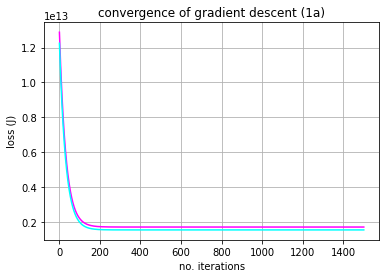

In [10]:
#plot loss (two lines, one graph)
plt.plot(range(1, iterations + 1),losstrain, color='magenta') 
plt.plot(range(1, iterations + 1),losstest, color='cyan') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('no. iterations') 
plt.ylabel('loss (J)') 
plt.title('convergence of gradient descent (1a)') 

1.b) Develop a gradient decent training and evaluation code that predicts housing price based on the following input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

Identify the best parameters for your linear regression model, based on the above input variables. 

Plot the training and validation losses (in a single graph, but two different lines) over your training iteration. Compare your linear regression model against problem 1 a. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best. 

In [11]:
#set the inputs and outputs
p1b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
input = df1[p1b] #for problem 1b
output = df1.iloc[:,0]

#split data into training and testing sets
np.random.seed(0)
xtrain, xtest, ytrain, ytest = train_test_split(input, output, train_size = 0.8, test_size = 0.2)
#print(xtrain) #debug purposes
#print(ytrain) #debug purposes

#concat ones vector like in hw0 problems
xtrain = pd.concat([pd.Series(1, index=xtrain.index, name='00'), xtrain], axis=1)
xtest = pd.concat([pd.Series(1, index=xtest.index, name='00'), xtest], axis=1)

#get the value of m for both sets (no. examples)
trainm = len(ytrain)
testm = len(ytest)

In [12]:
#reset our thetas
thetatrain = np.array([0]*len(xtrain.columns))
thetatest = np.array([0]*len(xtest.columns))
#print(thetatrain) #print for verification

#other variables for testing
iterations = 1500
alpha = 0.0000000005 #does not converge unless extremely small value is used

In [13]:
#perform loss for both sets and print the values
losstrain = compute_loss(xtrain, ytrain, thetatrain, trainm) 
print('training loss =', losstrain) 

losstest = compute_loss(xtest, ytest, thetatest,testm) 
print('testing loss =', losstest)

training loss = 13234989983633.717
testing loss = 12594621888761.469


In [14]:
#perform gradient descent for training set
thetatrain = np.array([0]*len(xtrain.columns))

thetatrain, losstrain = gradient_descent(xtrain, ytrain, thetatrain, trainm, alpha, iterations)
print('Final theta (training): \n', thetatrain)

Final theta (training): 
 00                   0.399039
area               861.036290
bedrooms             1.430475
bathrooms            0.750724
stories              1.133287
mainroad             0.361456
guestroom            0.148668
basement             0.244754
hotwaterheating      0.057863
airconditioning      0.282683
parking              0.368672
prefarea             0.163826
dtype: float64


In [15]:
#gradient descent for testing set
thetatest = np.array([0]*len(xtest.columns))

thetatest, losstest = gradient_descent(xtest, ytest, thetatest, testm, alpha, iterations)
print('Final theta (testing): \n', thetatest)

Final theta (testing): 
 00                   0.455588
area               834.814144
bedrooms             1.509792
bathrooms            0.813242
stories              1.237392
mainroad             0.369749
guestroom            0.097901
basement             0.222160
hotwaterheating      0.015271
airconditioning      0.300202
parking              0.237385
prefarea             0.135720
dtype: float64


Text(0.5, 1.0, 'convergence of gradient descent (1b)')

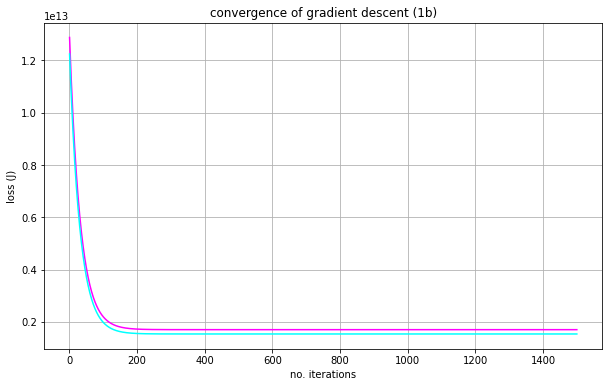

In [16]:
#plot loss (two lines, one graph)
plt.plot(range(1, iterations + 1),losstrain, color='magenta') 
plt.plot(range(1, iterations + 1),losstest, color='cyan') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('no. iterations') 
plt.ylabel('loss (J)') 
plt.title('convergence of gradient descent (1b)') 

Problem 2 (30 points)

2.a) Repeat problem 1 a, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. 

Plot the training and validation losses for both training and validation set based on input standardization and input normalization. Compare your training accuracy between both scaling approaches as well as the baseline training in problem 1 a. Which input scaling achieves the best training? Explain your results.

In [17]:
#configure data sets
dfnorm = pd.read_csv(data_set)
dfstand = pd.read_csv(data_set)

In [18]:
#convert dataframes
dfnorm[varlist] = dfnorm[varlist].apply(binarymap)
dfstand[varlist] = dfstand[varlist].apply(binarymap)

In [19]:
#normalize
newvars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
scaler = MinMaxScaler()
dfnorm[newvars] = scaler.fit_transform(dfnorm[newvars])

#standardize
scaler = StandardScaler()
dfstand[newvars] = scaler.fit_transform(dfstand[newvars])

In [20]:
#NORMALIZED DATA:
#set the inputs and outputs
norm_input = dfnorm[p1a]
norm_output = dfnorm.iloc[:,0]

#split data into training and testing sets
np.random.seed(0)
norm_xtrain, norm_xtest, norm_ytrain, norm_ytest = train_test_split(norm_input, norm_output, train_size = 0.8, test_size = 0.2)

#concat ones vector like in hw0 problems
norm_xtrain = pd.concat([pd.Series(1, index=norm_xtrain.index, name='00'), norm_xtrain], axis=1)
norm_xtest = pd.concat([pd.Series(1, index=norm_xtest.index, name='00'), norm_xtest], axis=1)

#get the value of m for both sets (no. examples)
norm_trainm = len(norm_ytrain)
norm_testm = len(norm_ytest)

In [21]:
#STANDARDIZED DATA:
#set the inputs and outputs
stand_input = dfstand[p1a]
stand_output = dfstand.iloc[:,0]

#split data into training and testing sets
np.random.seed(0)
stand_xtrain, stand_xtest, stand_ytrain, stand_ytest = train_test_split(stand_input, stand_output, train_size = 0.8, test_size = 0.2)

#concat ones vector
stand_xtrain = pd.concat([pd.Series(1, index=stand_xtrain.index, name='00'), stand_xtrain], axis=1)
stand_xtest = pd.concat([pd.Series(1, index=stand_xtest.index, name='00'), stand_xtest], axis=1)

#get the value of m for both sets (no. examples)
stand_trainm = len(stand_ytrain)
stand_testm = len(stand_ytest)

In [22]:
#reset our thetas
norm_thetatrain = np.array([0]*len(norm_xtrain.columns))
norm_thetatest = np.array([0]*len(norm_xtest.columns))

stand_thetatrain = np.array([0]*len(stand_xtrain.columns))
stand_thetatest = np.array([0]*len(stand_xtest.columns))

#other variables for testing
iterations = 1500
alpha = 0.01

In [23]:
#NORMALIZED perform loss for both sets and print the values
norm_losstrain = compute_loss(norm_xtrain, norm_ytrain, norm_thetatrain, norm_trainm) 
print('normalized training loss =', norm_losstrain) 

norm_losstest = compute_loss(norm_xtest, norm_ytest, norm_thetatest,norm_testm) 
print('normalized testing loss =', norm_losstest)

#STANDARDIZED perform loss for both sets and print the values
stand_losstrain = compute_loss(stand_xtrain, stand_ytrain, stand_thetatrain, stand_trainm) 
print('normalized training loss =', stand_losstrain) 

stand_losstest = compute_loss(stand_xtest, stand_ytest, stand_thetatest,stand_testm) 
print('standardized testing loss =', stand_losstest)

normalized training loss = 0.04801543008963699
normalized testing loss = 0.04393049047607012
normalized training loss = 0.5217884456417313
standardized testing loss = 0.4128462174330742


In [24]:
#NORMALIZED:
#perform gradient descent for training set
norm_thetatrain = np.array([0]*len(norm_xtrain.columns))

norm_thetatrain, norm_losstrain = gradient_descent(norm_xtrain, norm_ytrain, norm_thetatrain, norm_trainm, alpha, iterations)
print('NORMALIZED Final theta (training): \n', norm_thetatrain)

#gradient descent for testing set
norm_thetatest = np.array([0]*len(norm_xtest.columns))

norm_thetatest, norm_losstest = gradient_descent(norm_xtest, norm_ytest, norm_thetatest, norm_testm, alpha, iterations)
print('NORMALIZED Final theta (testing): \n', norm_thetatest)

NORMALIZED Final theta (training): 
 00           0.109389
area         0.150793
bedrooms     0.102187
bathrooms    0.129455
stories      0.139002
parking      0.125887
dtype: float64
NORMALIZED Final theta (testing): 
 00           0.120850
area         0.144361
bedrooms     0.065628
bathrooms    0.134837
stories      0.144007
parking      0.136511
dtype: float64


In [25]:
#STANDARDIZED:
#perform gradient descent for training set
stand_thetatrain = np.array([0]*len(stand_xtrain.columns))

stand_thetatrain, stand_losstrain = gradient_descent(stand_xtrain, stand_ytrain, stand_thetatrain, stand_trainm, alpha, iterations)
print('STANDARDIZED Final theta (training): \n', stand_thetatrain)

#gradient descent for testing set
stand_thetatest = np.array([0]*len(stand_xtest.columns))

stand_thetatest, stand_losstest = gradient_descent(stand_xtest, stand_ytest, stand_thetatest, stand_testm, alpha, iterations)
print('STANDARDIZED Final theta (testing): \n', stand_thetatest)

STANDARDIZED Final theta (training): 
 00           0.003658
area         0.402664
bedrooms     0.090386
bathrooms    0.319570
stories      0.243954
parking      0.161167
dtype: float64
STANDARDIZED Final theta (testing): 
 00          -0.000679
area         0.310736
bedrooms    -0.042381
bathrooms    0.273706
stories      0.295756
parking      0.226981
dtype: float64


Text(0.5, 1.0, 'NORMALIZED convergence of gradient descent (2a)')

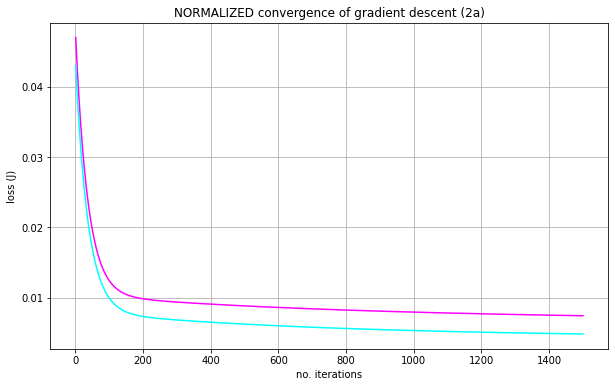

In [26]:
#NORMALIZED
#plot loss (two lines, one graph)
plt.plot(range(1, iterations + 1),norm_losstrain, color='magenta') 
plt.plot(range(1, iterations + 1),norm_losstest, color='cyan') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('no. iterations') 
plt.ylabel('loss (J)') 
plt.title('NORMALIZED convergence of gradient descent (2a)') 

Text(0.5, 1.0, 'STANDARDIZED convergence of gradient descent (2a)')

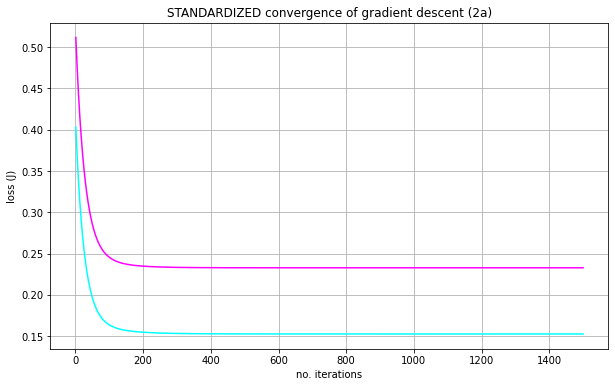

In [27]:
#STANDARDIZED
#plot loss (two lines, one graph)
plt.plot(range(1, iterations + 1),stand_losstrain, color='magenta') 
plt.plot(range(1, iterations + 1),stand_losstest, color='cyan') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('no. iterations') 
plt.ylabel('loss (J)') 
plt.title('STANDARDIZED convergence of gradient descent (2a)') 

2.b) Repeat problem 1 b, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. 

Plot the training and validation losses for both training and validation set based on input standardization and input normalization. Compare your training accuracy between both scaling approaches as well as the baseline training in problem 1 b. Which input scaling achieves the best training? Explain your results.

In [28]:
#NORMALIZED DATA:
#set the inputs and outputs
norm_input = dfnorm[p1b]
norm_output = dfnorm.iloc[:,0]

#split data into training and testing sets
np.random.seed(0)
norm_xtrain, norm_xtest, norm_ytrain, norm_ytest = train_test_split(norm_input, norm_output, train_size = 0.8, test_size = 0.2)

#concat ones vector like in hw0 problems
norm_xtrain = pd.concat([pd.Series(1, index=norm_xtrain.index, name='00'), norm_xtrain], axis=1)
norm_xtest = pd.concat([pd.Series(1, index=norm_xtest.index, name='00'), norm_xtest], axis=1)

#get the value of m for both sets (no. examples)
norm_trainm = len(norm_ytrain)
norm_testm = len(norm_ytest)

In [29]:
#STANDARDIZED DATA:
#set the inputs and outputs
stand_input = dfstand[p1b]
stand_output = dfstand.iloc[:,0]

#split data into training and testing sets
np.random.seed(0)
stand_xtrain, stand_xtest, stand_ytrain, stand_ytest = train_test_split(stand_input, stand_output, train_size = 0.8, test_size = 0.2)

#concat ones vector
stand_xtrain = pd.concat([pd.Series(1, index=stand_xtrain.index, name='00'), stand_xtrain], axis=1)
stand_xtest = pd.concat([pd.Series(1, index=stand_xtest.index, name='00'), stand_xtest], axis=1)

#get the value of m for both sets (no. examples)
stand_trainm = len(stand_ytrain)
stand_testm = len(stand_ytest)

In [30]:
#reset our thetas
norm_thetatrain = np.array([0]*len(norm_xtrain.columns))
norm_thetatest = np.array([0]*len(norm_xtest.columns))

stand_thetatrain = np.array([0]*len(stand_xtrain.columns))
stand_thetatest = np.array([0]*len(stand_xtest.columns))

In [31]:
#NORMALIZED perform loss for both sets and print the values
norm_losstrain = compute_loss(norm_xtrain, norm_ytrain, norm_thetatrain, norm_trainm) 
print('normalized training loss =', norm_losstrain) 

norm_losstest = compute_loss(norm_xtest, norm_ytest, norm_thetatest,norm_testm) 
print('normalized testing loss =', norm_losstest)

#STANDARDIZED perform loss for both sets and print the values
stand_losstrain = compute_loss(stand_xtrain, stand_ytrain, stand_thetatrain, stand_trainm) 
print('normalized training loss =', stand_losstrain) 

stand_losstest = compute_loss(stand_xtest, stand_ytest, stand_thetatest,stand_testm) 
print('standardized testing loss =', stand_losstest)

normalized training loss = 0.04801543008963699
normalized testing loss = 0.04393049047607012
normalized training loss = 0.5217884456417313
standardized testing loss = 0.4128462174330742


In [32]:
#NORMALIZED:
#perform gradient descent for training set
norm_thetatrain = np.array([0]*len(norm_xtrain.columns))

norm_thetatrain, norm_losstrain = gradient_descent(norm_xtrain, norm_ytrain, norm_thetatrain, norm_trainm, alpha, iterations)
print('NORMALIZED Final theta (training): \n', norm_thetatrain)

#gradient descent for testing set
norm_thetatest = np.array([0]*len(norm_xtest.columns))

norm_thetatest, norm_losstest = gradient_descent(norm_xtest, norm_ytest, norm_thetatest, norm_testm, alpha, iterations)
print('NORMALIZED Final theta (testing): \n', norm_thetatest)

NORMALIZED Final theta (training): 
 00                 0.038536
area               0.098657
bedrooms           0.067438
bathrooms          0.107700
stories            0.107688
mainroad           0.052297
guestroom          0.048505
basement           0.029722
hotwaterheating    0.053750
airconditioning    0.094004
parking            0.088705
prefarea           0.077049
dtype: float64
NORMALIZED Final theta (testing): 
 00                 0.044399
area               0.102135
bedrooms           0.054409
bathrooms          0.121008
stories            0.107846
mainroad           0.067521
guestroom         -0.002835
basement           0.038806
hotwaterheating    0.016171
airconditioning    0.102181
parking            0.118844
prefarea           0.009920
dtype: float64


In [33]:
#STANDARDIZED:
#perform gradient descent for training set
stand_thetatrain = np.array([0]*len(stand_xtrain.columns))

stand_thetatrain, stand_losstrain = gradient_descent(stand_xtrain, stand_ytrain, stand_thetatrain, stand_trainm, alpha, iterations)
print('STANDARDIZED Final theta (training): \n', stand_thetatrain)

#gradient descent for testing set
stand_thetatest = np.array([0]*len(stand_xtest.columns))

stand_thetatest, stand_losstest = gradient_descent(stand_xtest, stand_ytest, stand_thetatest, stand_testm, alpha, iterations)
print('STANDARDIZED Final theta (testing): \n', stand_thetatest)

STANDARDIZED Final theta (training): 
 00                -0.379139
area               0.315981
bedrooms           0.058781
bathrooms          0.280461
stories            0.222326
mainroad           0.080774
guestroom          0.215474
basement           0.197584
hotwaterheating    0.227280
airconditioning    0.393569
parking            0.135045
prefarea           0.348431
dtype: float64
STANDARDIZED Final theta (testing): 
 00                -0.382504
area               0.259371
bedrooms          -0.014591
bathrooms          0.257345
stories            0.248267
mainroad           0.151594
guestroom         -0.026915
basement           0.253436
hotwaterheating    0.058321
airconditioning    0.435541
parking            0.231631
prefarea           0.159978
dtype: float64


Text(0.5, 1.0, 'NORMALIZED convergence of gradient descent (2b)')

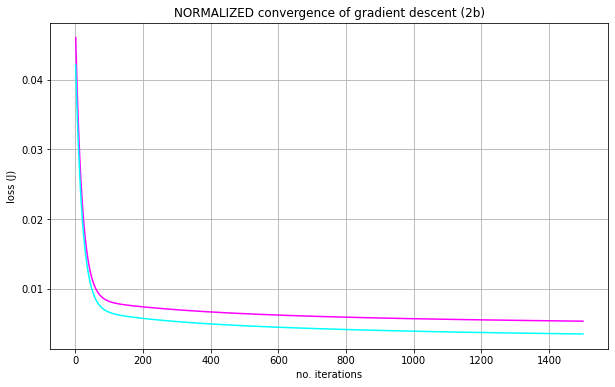

In [34]:
#NORMALIZED
#plot loss (two lines, one graph)
plt.plot(range(1, iterations + 1),norm_losstrain, color='magenta') 
plt.plot(range(1, iterations + 1),norm_losstest, color='cyan') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('no. iterations') 
plt.ylabel('loss (J)') 
plt.title('NORMALIZED convergence of gradient descent (2b)') 

Text(0.5, 1.0, 'STANDARDIZED convergence of gradient descent (2b)')

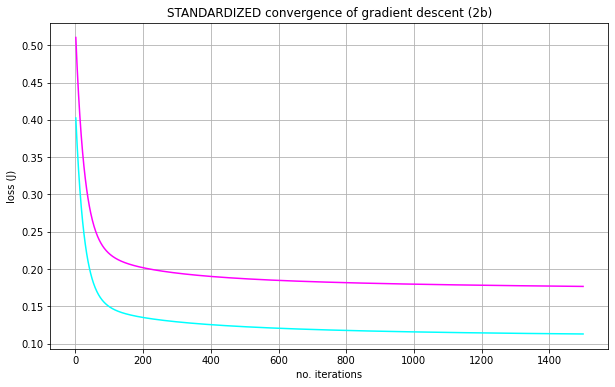

In [35]:
#STANDARDIZED
#plot loss (two lines, one graph)
plt.plot(range(1, iterations + 1),stand_losstrain, color='magenta') 
plt.plot(range(1, iterations + 1),stand_losstest, color='cyan') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('no. iterations') 
plt.ylabel('loss (J)') 
plt.title('STANDARDIZED convergence of gradient descent (2b)') 

Problem 3 (40 points)

3.a) Repeat problem 2 a, this time by adding parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.  

Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 a. 

In [36]:
#NORMALIZED DATA:
#set the inputs and outputs
norm_input = dfnorm[p1a]
norm_output = dfnorm.iloc[:,0]

#split data into training and testing sets
np.random.seed(0)
norm_xtrain, norm_xtest, norm_ytrain, norm_ytest = train_test_split(norm_input, norm_output, train_size = 0.8, test_size = 0.2)

#concat ones vector like in hw0 problems
norm_xtrain = pd.concat([pd.Series(1, index=norm_xtrain.index, name='00'), norm_xtrain], axis=1)
norm_xtest = pd.concat([pd.Series(1, index=norm_xtest.index, name='00'), norm_xtest], axis=1)

#get the value of m for both sets (no. examples)
norm_trainm = len(norm_ytrain)
norm_testm = len(norm_ytest)

In [37]:
#STANDARDIZED DATA:
#set the inputs and outputs
stand_input = dfstand[p1a]
stand_output = dfstand.iloc[:,0]

#split data into training and testing sets
np.random.seed(0)
stand_xtrain, stand_xtest, stand_ytrain, stand_ytest = train_test_split(stand_input, stand_output, train_size = 0.8, test_size = 0.2)

#concat ones vector
stand_xtrain = pd.concat([pd.Series(1, index=stand_xtrain.index, name='00'), stand_xtrain], axis=1)
stand_xtest = pd.concat([pd.Series(1, index=stand_xtest.index, name='00'), stand_xtest], axis=1)

#get the value of m for both sets (no. examples)
stand_trainm = len(stand_ytrain)
stand_testm = len(stand_ytest)

In [38]:
#reset our thetas
norm_thetatrain = np.array([0]*len(norm_xtrain.columns))
norm_thetatest = np.array([0]*len(norm_xtest.columns))

stand_thetatrain = np.array([0]*len(stand_xtrain.columns))
stand_thetatest = np.array([0]*len(stand_xtest.columns))

#other variables for testing
iterations = 1500
alpha = 0.01

In [39]:
#NORMALIZED perform loss for both sets and print the values
norm_losstrain = compute_loss(norm_xtrain, norm_ytrain, norm_thetatrain, norm_trainm) 
print('normalized training loss =', norm_losstrain) 

norm_losstest = compute_loss(norm_xtest, norm_ytest, norm_thetatest,norm_testm) 
print('normalized testing loss =', norm_losstest)

#STANDARDIZED perform loss for both sets and print the values
stand_losstrain = compute_loss(stand_xtrain, stand_ytrain, stand_thetatrain, stand_trainm) 
print('normalized training loss =', stand_losstrain) 

stand_losstest = compute_loss(stand_xtest, stand_ytest, stand_thetatest,stand_testm) 
print('standardized testing loss =', stand_losstest)

normalized training loss = 0.04801543008963699
normalized testing loss = 0.04393049047607012
normalized training loss = 0.5217884456417313
standardized testing loss = 0.4128462174330742


In [40]:
# redefine gradient descent with penalty function added:
lamb = 0.01 #constant, amount of penalty to add
def pgradient_descent(input, y, theta, m, alpha, iterations): 

  loss_history = np.zeros(iterations) 
 
  for i in range(iterations): 
    predictions = input.dot(theta) 
    errors = np.subtract(predictions, y) 
    sum_delta = (alpha / m) * input.transpose().dot(errors); 

    #ADD PENALTY:
    if i > 0:
      sum_delta += ((alpha*lamb) / m) * theta # formula from class

    theta = theta - sum_delta; 
    loss_history[i] = compute_loss(input, y, theta, m)   
    
  return theta, loss_history 

In [41]:
#NORMALIZED:
#perform gradient descent for training set
norm_thetatrain = np.array([0]*len(norm_xtrain.columns))

norm_thetatrain, norm_losstrain = pgradient_descent(norm_xtrain, norm_ytrain, norm_thetatrain, norm_trainm, alpha, iterations)
print('NORMALIZED Final theta (training): \n', norm_thetatrain)

#gradient descent for testing set
norm_thetatest = np.array([0]*len(norm_xtest.columns))

norm_thetatest, norm_losstest = pgradient_descent(norm_xtest, norm_ytest, norm_thetatest, norm_testm, alpha, iterations)
print('NORMALIZED Final theta (testing): \n', norm_thetatest)

NORMALIZED Final theta (training): 
 00           0.109398
area         0.150776
bedrooms     0.102182
bathrooms    0.129438
stories      0.138990
parking      0.125877
dtype: float64
NORMALIZED Final theta (testing): 
 00           0.120880
area         0.144299
bedrooms     0.065634
bathrooms    0.134770
stories      0.143955
parking      0.136457
dtype: float64


In [42]:
#STANDARDIZED:
#perform gradient descent for training set
stand_thetatrain = np.array([0]*len(stand_xtrain.columns))

stand_thetatrain, stand_losstrain = pgradient_descent(stand_xtrain, stand_ytrain, stand_thetatrain, stand_trainm, alpha, iterations)
print('STANDARDIZED Final theta (training): \n', stand_thetatrain)

#gradient descent for testing set
stand_thetatest = np.array([0]*len(stand_xtest.columns))

stand_thetatest, stand_losstest = pgradient_descent(stand_xtest, stand_ytest, stand_thetatest, stand_testm, alpha, iterations)
print('STANDARDIZED Final theta (testing): \n', stand_thetatest)

STANDARDIZED Final theta (training): 
 00           0.003658
area         0.402655
bedrooms     0.090389
bathrooms    0.319563
stories      0.243950
parking      0.161167
dtype: float64
STANDARDIZED Final theta (testing): 
 00          -0.000682
area         0.310719
bedrooms    -0.042356
bathrooms    0.273694
stories      0.295724
parking      0.226965
dtype: float64


Text(0.5, 1.0, 'NORMALIZED convergence of gradient descent w/penalty (3a)')

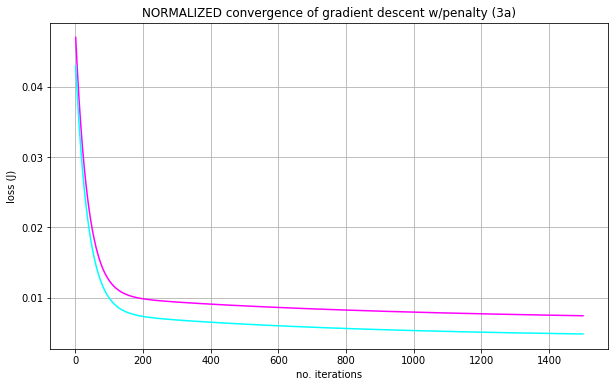

In [43]:
#NORMALIZED
#plot loss (two lines, one graph)
plt.plot(range(1, iterations + 1),norm_losstrain, color='magenta') 
plt.plot(range(1, iterations + 1),norm_losstest, color='cyan') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('no. iterations') 
plt.ylabel('loss (J)') 
plt.title('NORMALIZED convergence of gradient descent w/penalty (3a)') 

Text(0.5, 1.0, 'STANDARDIZED convergence of gradient descent w/penalty (3a)')

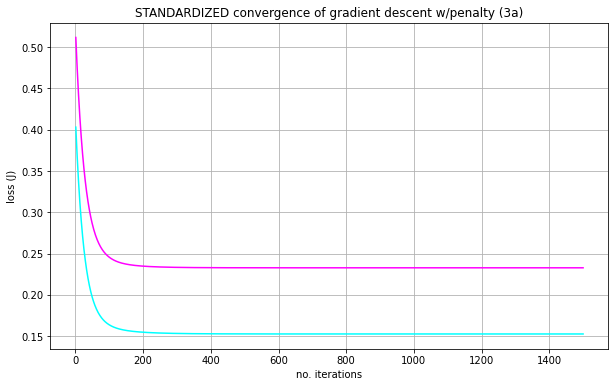

In [44]:
#STANDARDIZED
#plot loss (two lines, one graph)
plt.plot(range(1, iterations + 1),stand_losstrain, color='magenta') 
plt.plot(range(1, iterations + 1),stand_losstest, color='cyan') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('no. iterations') 
plt.ylabel('loss (J)') 
plt.title('STANDARDIZED convergence of gradient descent w/penalty (3a)') 

3.b) Repeat problem 2 b, this time by adding parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.  

Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 b. 

In [53]:
#NORMALIZED DATA:
#set the inputs and outputs
norm_input = dfnorm[p1b]
norm_output = dfnorm.iloc[:,0]

#split data into training and testing sets
np.random.seed(1)
norm_xtrain, norm_xtest, norm_ytrain, norm_ytest = train_test_split(norm_input, norm_output, train_size = 0.8, test_size = 0.2)

#concat ones vector like in hw0 problems
norm_xtrain = pd.concat([pd.Series(1, index=norm_xtrain.index, name='00'), norm_xtrain], axis=1)
norm_xtest = pd.concat([pd.Series(1, index=norm_xtest.index, name='00'), norm_xtest], axis=1)

#get the value of m for both sets (no. examples)
norm_trainm = len(norm_ytrain)
norm_testm = len(norm_ytest)

In [54]:
#STANDARDIZED DATA:
#set the inputs and outputs
stand_input = dfstand[p1b]
stand_output = dfstand.iloc[:,0]

#split data into training and testing sets
np.random.seed(1)
stand_xtrain, stand_xtest, stand_ytrain, stand_ytest = train_test_split(stand_input, stand_output, train_size = 0.8, test_size = 0.2)

#concat ones vector
stand_xtrain = pd.concat([pd.Series(1, index=stand_xtrain.index, name='00'), stand_xtrain], axis=1)
stand_xtest = pd.concat([pd.Series(1, index=stand_xtest.index, name='00'), stand_xtest], axis=1)

#get the value of m for both sets (no. examples)
stand_trainm = len(stand_ytrain)
stand_testm = len(stand_ytest)

In [55]:
#reset our thetas
norm_thetatrain = np.array([0]*len(norm_xtrain.columns))
norm_thetatest = np.array([0]*len(norm_xtest.columns))

stand_thetatrain = np.array([0]*len(stand_xtrain.columns))
stand_thetatest = np.array([0]*len(stand_xtest.columns))

In [56]:
#NORMALIZED perform loss for both sets and print the values
norm_losstrain = compute_loss(norm_xtrain, norm_ytrain, norm_thetatrain, norm_trainm) 
print('normalized training loss =', norm_losstrain) 

norm_losstest = compute_loss(norm_xtest, norm_ytest, norm_thetatest,norm_testm) 
print('normalized testing loss =', norm_losstest)

#STANDARDIZED perform loss for both sets and print the values
stand_losstrain = compute_loss(stand_xtrain, stand_ytrain, stand_thetatrain, stand_trainm) 
print('normalized training loss =', stand_losstrain) 

stand_losstest = compute_loss(stand_xtest, stand_ytest, stand_thetatest,stand_testm) 
print('standardized testing loss =', stand_losstest)

normalized training loss = 0.04658187592834096
normalized testing loss = 0.04966470712125424
normalized training loss = 0.47468816293655375
standardized testing loss = 0.6012473482537845


In [57]:
#NORMALIZED:
#perform gradient descent for training set
norm_thetatrain = np.array([0]*len(norm_xtrain.columns))

norm_thetatrain, norm_losstrain = pgradient_descent(norm_xtrain, norm_ytrain, norm_thetatrain, norm_trainm, alpha, iterations)
print('NORMALIZED Final theta (training): \n', norm_thetatrain)

#gradient descent for testing set
norm_thetatest = np.array([0]*len(norm_xtest.columns))

norm_thetatest, norm_losstest = pgradient_descent(norm_xtest, norm_ytest, norm_thetatest, norm_testm, alpha, iterations)
print('NORMALIZED Final theta (testing): \n', norm_thetatest)

NORMALIZED Final theta (training): 
 00                 0.040925
area               0.097148
bedrooms           0.066502
bathrooms          0.117696
stories            0.111609
mainroad           0.056551
guestroom          0.044937
basement           0.037810
hotwaterheating    0.047080
airconditioning    0.080053
parking            0.092157
prefarea           0.061377
dtype: float64
NORMALIZED Final theta (testing): 
 00                 0.033103
area               0.119838
bedrooms           0.057029
bathrooms          0.085256
stories            0.101005
mainroad           0.047497
guestroom          0.018866
basement          -0.001194
hotwaterheating    0.039078
airconditioning    0.149549
parking            0.097991
prefarea           0.082081
dtype: float64


In [58]:
#STANDARDIZED:
#perform gradient descent for training set
stand_thetatrain = np.array([0]*len(stand_xtrain.columns))

stand_thetatrain, stand_losstrain = pgradient_descent(stand_xtrain, stand_ytrain, stand_thetatrain, stand_trainm, alpha, iterations)
print('STANDARDIZED Final theta (training): \n', stand_thetatrain)

#gradient descent for testing set
stand_thetatest = np.array([0]*len(stand_xtest.columns))

stand_thetatest, stand_losstest = pgradient_descent(stand_xtest, stand_ytest, stand_thetatest, stand_testm, alpha, iterations)
print('STANDARDIZED Final theta (testing): \n', stand_thetatest)

STANDARDIZED Final theta (training): 
 00                -0.382037
area               0.290160
bedrooms           0.032268
bathrooms          0.290474
stories            0.249415
mainroad           0.106737
guestroom          0.188628
basement           0.261146
hotwaterheating    0.208216
airconditioning    0.301778
parking            0.146869
prefarea           0.304468
dtype: float64
STANDARDIZED Final theta (testing): 
 00                -0.328215
area               0.454008
bedrooms           0.081618
bathrooms          0.187440
stories            0.144995
mainroad          -0.005568
guestroom          0.091291
basement          -0.071895
hotwaterheating    0.076140
airconditioning    0.733198
parking            0.131542
prefarea           0.478442
dtype: float64


Text(0.5, 1.0, 'NORMALIZED convergence of gradient descent w/penalty (3b)')

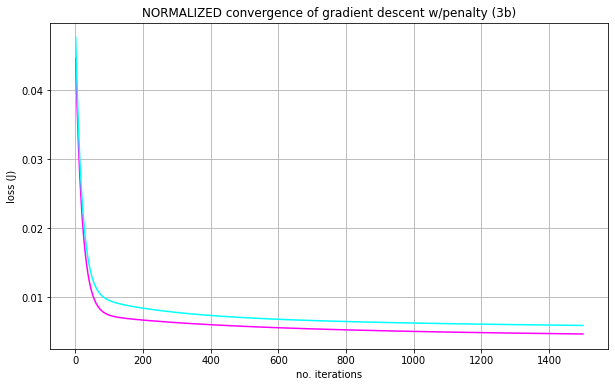

In [59]:
#NORMALIZED
#plot loss (two lines, one graph)
plt.plot(range(1, iterations + 1),norm_losstrain, color='magenta') 
plt.plot(range(1, iterations + 1),norm_losstest, color='cyan') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('no. iterations') 
plt.ylabel('loss (J)') 
plt.title('NORMALIZED convergence of gradient descent w/penalty (3b)') 

Text(0.5, 1.0, 'STANDARDIZED convergence of gradient descent w/penalty (3b)')

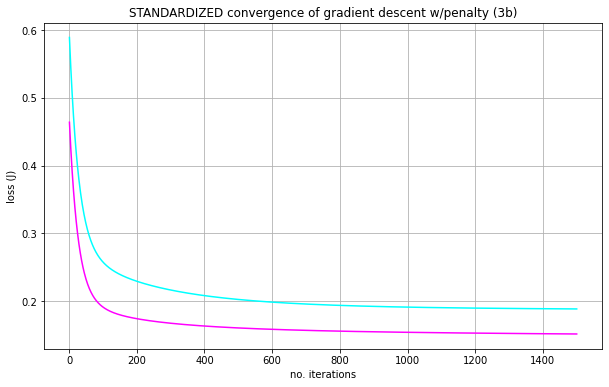

In [60]:
#STANDARDIZED
#plot loss (two lines, one graph)
plt.plot(range(1, iterations + 1),stand_losstrain, color='magenta') 
plt.plot(range(1, iterations + 1),stand_losstest, color='cyan') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('no. iterations') 
plt.ylabel('loss (J)') 
plt.title('STANDARDIZED convergence of gradient descent w/penalty (3b)') 